## PCA using SKLearn ##

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from util import getKaggleMNIST

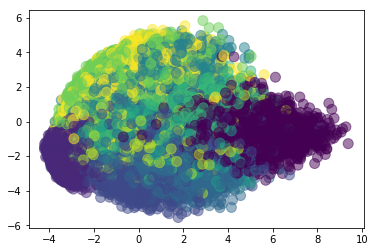

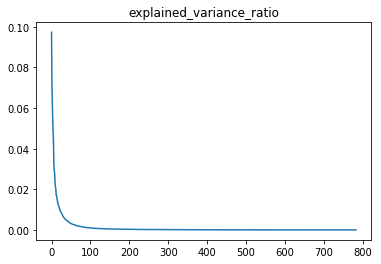

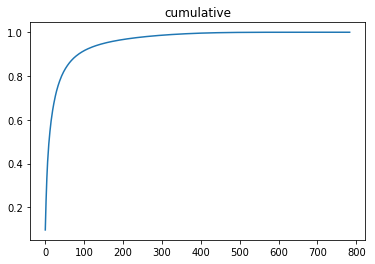

In [15]:
Xtrain, Ytrain, Xtest, Ytest = getKaggleMNIST()

pca = PCA()
reduced = pca.fit_transform(Xtrain)
plt.scatter(reduced[:,0], reduced[:,1], s=100, c=Ytrain, alpha=0.5)
plt.show()

plt.plot(pca.explained_variance_ratio_)
plt.title('explained_variance_ratio')
plt.show()

# cumulative variance
# choose k = number of dimensions that gives us 95-99% variance
cumulative = []
last = 0
for v in pca.explained_variance_ratio_:
    cumulative.append(last + v)
    last = cumulative[-1]
plt.plot(cumulative)
plt.title('cumulative')
plt.show()

## PCA Implementation ##

In [49]:
# decompose covariance
covX = np.cov(Xtrain.T)
lambdas, Q = np.linalg.eigh(covX)
imp = lambdas

In [50]:
# lambdas are sorted from smallest --> largest
# some may be slightly negative due to precision
idx = np.argsort(-lambdas)
lambdas = lambdas[idx] # sort in proper order
lambdas = np.maximum(lambdas, 0) # get rid of negatives
Q = Q[:,idx]

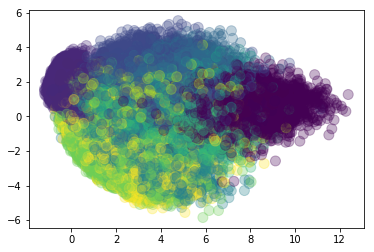

In [51]:
# plot the first 2 columns of Z
Z = Xtrain.dot(Q)
plt.scatter(Z[:,0], Z[:,1], s=100, c=Ytrain, alpha=0.3)
plt.show()

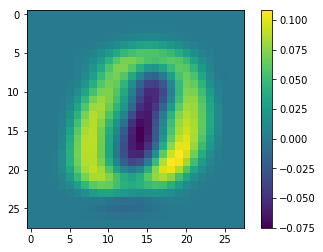

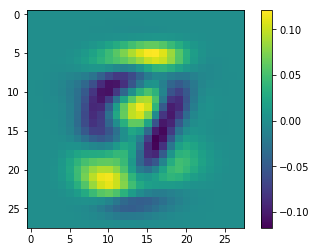

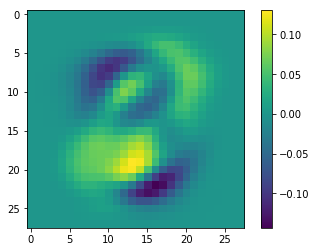

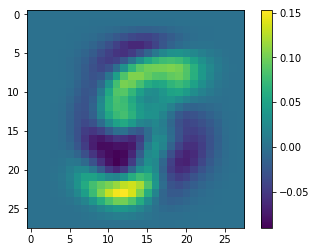

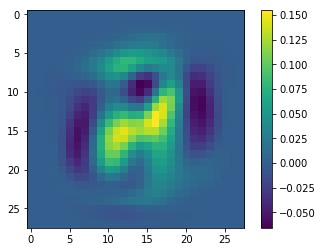

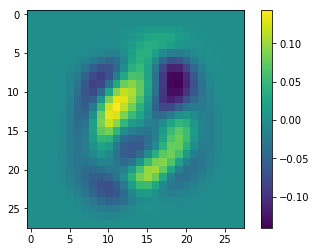

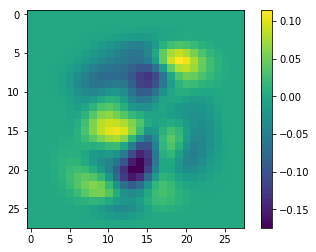

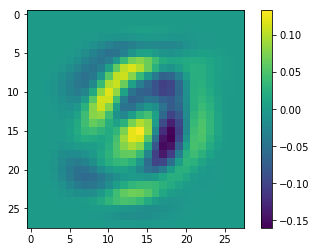

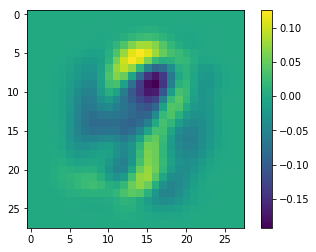

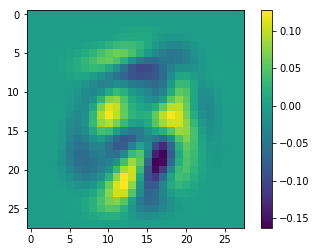

In [63]:
#visualize important parts of some samples
for i in range(10):
    sample = Q[:,i].reshape([28,28])
    plt.imshow(sample)
    plt.colorbar()
    plt.show()

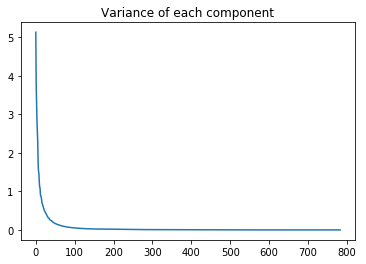

In [7]:
# plot variances
plt.plot(lambdas)
plt.title("Variance of each component")
plt.show()

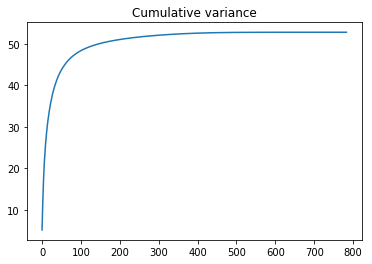

In [8]:
# cumulative variance
plt.plot(np.cumsum(lambdas))
plt.title("Cumulative variance")
plt.show()